In [8]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

file = '/scratch/jmarti91/cesmpreind_regularMLD.nc'
#Reading out the entire data set
ds=xr.open_dataset(file)

Reading out the mixed layer depth and plotting the climatology. The data can't be separated by months with groupby, so it has to be converted to a numpy array so that the climatology can be calculated.

In [9]:
MLD = np.array(ds['MLD'])
lon = np.array(ds['LON'])
lat = np.array(ds['LAT'])
MLD.shape = (100,12,161,361)
MLD = np.mean(MLD,axis=0)/100

Plotting the Climatology for the century

Text(0.5, 0.98, 'Mixed Layer Depth')

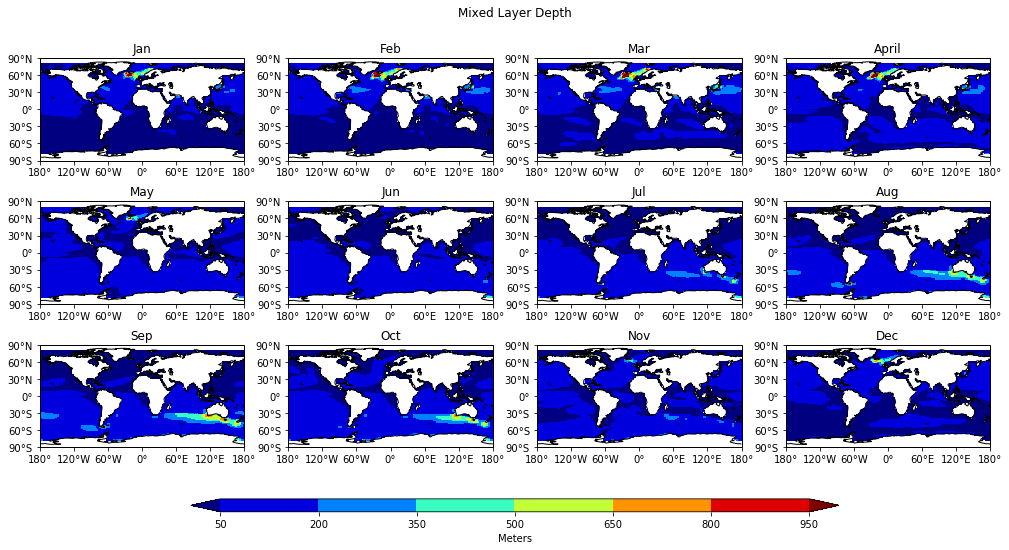

In [10]:
fig,ax = plt.subplots(nrows=3,ncols=4,subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(15,9))
ax = ax.flatten()

clevs = np.arange(50,951,150)
months = ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i, mon in enumerate(months):
    cs = ax[i].contourf(lon,lat,MLD[i],cmap='jet',transform=ccrs.PlateCarree(),extend='both',levels=clevs)
    
    #Longitude Labels
    ax[i].set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    
    #Latitude Labels
    ax[i].set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)

    
    ax[i].coastlines()
    #ax[i].gridlines()
    ax[i].set_title(mon)
    
#Make room for colorbar
fig.subplots_adjust(bottom=0.3,top=0.9,left=0.05,right=0.95,wspace=0.1,hspace=0.4)
cbar_ax = fig.add_axes([0.2,0.2,0.6,0.02])
cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Meters')
plt.suptitle('Mixed Layer Depth')